In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math as m
import os
from time import time as tm
from numba import cuda, njit, vectorize
from time import sleep, time
from findhubs import *
from a_star import *
from astro import *
from ConCreate import *

In [2]:
ConstParam = pd.read_excel(os.path.join('inputs', 'Constellation.xlsx'))
CP = ConstellationParameters(ConstParam['Satellites'].to_numpy(),ConstParam['Planes'].to_numpy(),
                             np.radians(ConstParam['Inclination'].to_numpy()),ConstParam['Altitude'].to_numpy(),
                             ConstParam['Raan shift'].to_numpy(),ConstParam['Shift'].to_numpy())


Constellation = CreateConstellation(CP)
Params = IniConstellation(CP,Constellation,[])
cartSat = UpdateConstellation(Params,Constellation,0)

In [3]:
TRF = []
T = 1000
for t in range(0,T):
    result = pd.read_csv(f'C:\\Users\Harkn\Desktop\BroadbandConst\outputs\PathsN\Paths_{t}.csv')
    traffic = result[['Traffic']].to_numpy().T[0]
    TRF.append(traffic)
TRF = np.asarray(TRF)

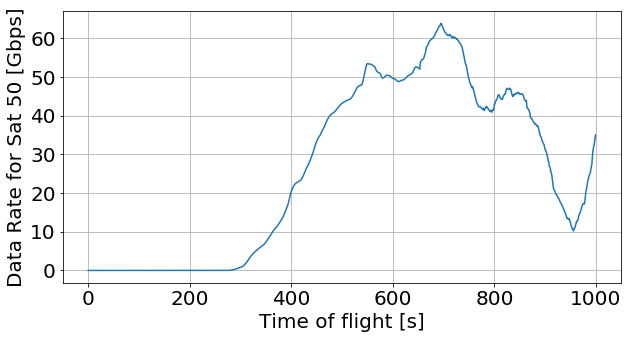

In [30]:
fontsize = 20

plt.figure(figsize=(10,5))
plt.plot(TRF[:,50]*0.1*8)
plt.xlabel('Time of flight [s]',fontsize=fontsize)
plt.ylabel(f'Data Rate for Sat {50} [Gbps]',fontsize=fontsize)
plt.grid()
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.savefig('Figures/UploadedDataSat.png',dpi=100,bbox_inches= 'tight')

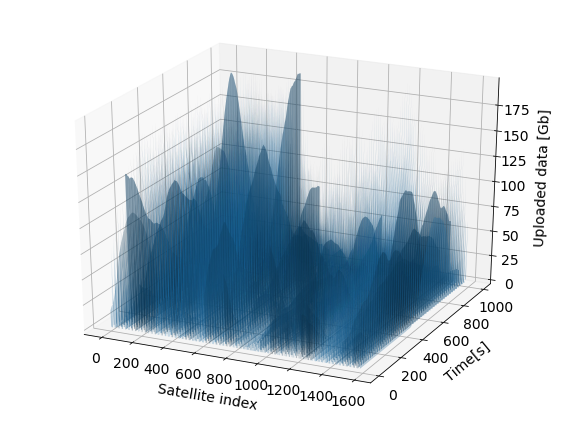

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fontsize = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
from matplotlib import cm

X = np.arange(traffic.shape[0])
Y = np.arange(T)
X, Y = np.meshgrid(X, Y)
Z = TRF*0.1

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,alpha=0.3)

plt.xlabel('Satellite index',fontsize = fontsize)
plt.ylabel('Time[s]',fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
ax.zaxis.set_tick_params(labelsize = fontsize)
ax.yaxis.labelpad = 10
ax.xaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.set_zlabel('Uploaded data [Gb]',fontsize = fontsize)
ax.view_init(25,-65)
plt.tight_layout()

plt.savefig('Figures/UploadedDataConst.png',dpi=100)


In [49]:
Full = []
for t in range(T):
    cartSat = UpdateConstellation(Params,Constellation,t)
    Distances = []
    for sat in Constellation:
        indexes = [link.globalid for link in sat.links.list][0]
        satC = cartSat[sat.globalid]
        linkC = cartSat[indexes]
        dists = np.sqrt(((linkC - satC)**2).sum())
        Distances.append(dists)
    Full.append(Distances)
BR = TRF.T*1e9*8*0.1
Full = np.asarray(Full)

In [60]:
h = 6.62607015e-34
c = 299792458
wavelength = 1064e-9
E = h*c/wavelength
thetta = 5e-6/2
thetta = 0

NoF = 133
nt = nr = 0.6
Dt = Dr = 0.135
Gr = (np.pi*Dt/wavelength)**2
Gt = (np.pi*Dr/wavelength)**2
Lt = np.e**(-Gt*thetta**2)
Lr = np.e**(-Gr*thetta**2)
M = 10**(5/10)
# BR = 1e9
# R = 2e6
R = Full.T
Ls = (wavelength/(4*np.pi*R))**2
Pt = E*NoF*BR*M/(nt*nr*Gt*Gr*Lt*Lr*Ls)
# print(Pt)

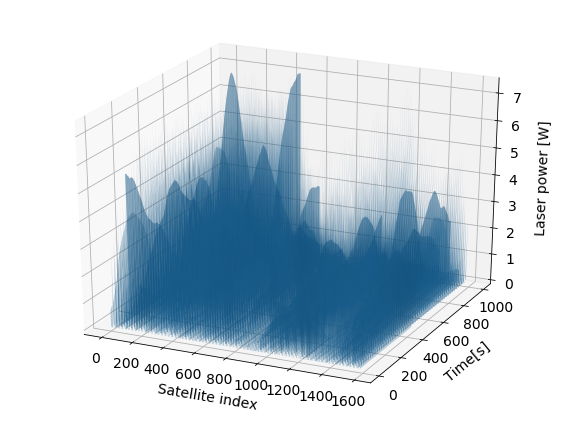

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fontsize = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
from matplotlib import cm

X = np.arange(Pt.shape[0])
Y = np.arange(T)
X, Y = np.meshgrid(X, Y)
Z = Pt.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,alpha=0.3)

plt.xlabel('Satellite index',fontsize = fontsize)
plt.ylabel('Time[s]',fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
ax.zaxis.set_tick_params(labelsize = fontsize)
ax.set_zlabel('Laser power [W]',fontsize = fontsize)
ax.yaxis.labelpad = 10
ax.xaxis.labelpad = 10
ax.zaxis.labelpad = 10


ax.view_init(25,-65)
plt.tight_layout()

# plt.savefig('Figures/LaserPowerConst.png',dpi=100)


In [62]:
Pt.max()

7.394950040218913